## **In this code, we explored the peculiarities of image arithmetic using OpenCV and NumPy.**

First we need to mount our code with google drive.

In [4]:
# To mount code with google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Import all the package that we will use for the code.

In [0]:
# Import the necessary packages
from __future__ import print_function
import numpy as np
import argparse
import cv2
from google.colab.patches import cv2_imshow

Set the path for the image that we will use for testing the code.

When you mount the code, folder **"drive"** will appear on the left screen when you click the **"file"** symbol. Then you just need to find the image in your drive and right click on that image.

A pop up will show some list then just click **"copy path"**. After that you just need to paste the path here.

In [0]:
# Construct the argument parser and parse the arguments
args = {
	# Task 1
	"image": '/content/drive/My Drive/Colab Notebooks/Image-Processing/corona.png',
	"image2": '/content/drive/My Drive/Colab Notebooks/Image-Processing/flower.jpg'
}

Now that we have the path to the image, we can load it off the disk using the cv2.imread function on Line 1. The cv2.imread function returns a NumPy array representing the image.

Then, displaying the actual image on our screen. The parameter is a reference to the image we loaded before.

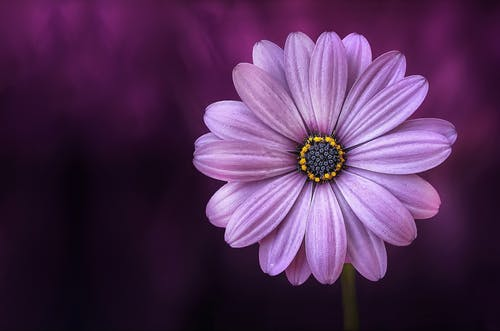

In [11]:
# Task 2
# Load the image and show it here :
image = cv2.imread(args['image2'])
cv2_imshow(image)

Images are NumPy arrays, stored as unsigned 8 bit integers. What does this mean? It means that the values of our pixels will be in the range [0, 255]. When using functions like cv2.add and cv2.subtract, values will be clipped to this range, even if the added or subtracted values fall outside the range of [0, 255]. Check out an example:

In [9]:
print("max of 255: {}".format(cv2.add(np.uint8([200]), np.uint8([100]))))
print(np.uint8([200]))
print(np.uint8([100]))
print("min of 0: {}".format(cv2.subtract(np.uint8([50]), np.uint8([100]))))


max of 255: [[255]]
[200]
[100]
min of 0: [[0]]


NOTE: If you use NumPy arithmetic operations on these arrays, the values will be modulos (wrap around) instead of being clipped to the [0, 255] arrange. This is important to keep in mind when working with images.

In [6]:
print("wrap around: {}".format(np.uint8([200]) + np.uint8([100])))
print(np.uint8([200]))
print(np.uint8([100]))
print("wrap around: {}".format(np.uint8([50]) - np.uint8([100])))

wrap around: [44]
[200]
[100]
wrap around: [206]


Let's increase the intensity of all pixels in our image by 100. We accomplish this by constructing a NumPy array that is the same size of our matrix (filled with ones) and the multiplying it by 100 to create an array filled with 100's. Then we simply add the images together. Notice how the image is "brighter".

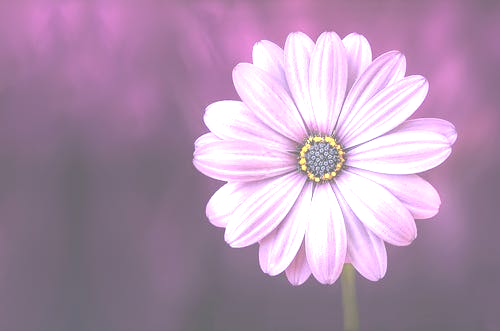

In [0]:
M = np.ones(image.shape, dtype = "uint8") * 100
# Task 3
# Apply cv2.add fucntion and show the image here :
bright = cv2.add(image,M)
cv2_imshow(bright)

We then create another NumPy array ﬁlled with 50’s on Line 4 and use the cv2.subtract function to subtract 50 from each pixel intensity of the image. Our image now looks considerably darker than the original T-Rex. Pixels that were once white now look gray. This is because we are subtracting 50 from the pixels and pushing them towards the darker regions of the RGB color space.

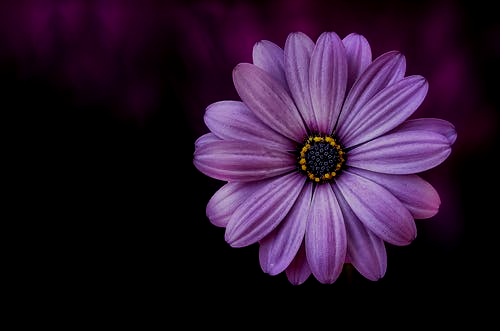

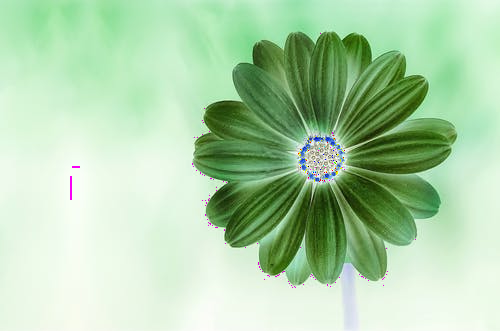

In [12]:
# Similarly, we can subtract 50 from all pixels in our
# image and make it darker:
M = np.ones(image.shape, dtype = "uint8") * 50
# Task 4
# Apply cv2.subtract fucntion and show the image here :
darken = cv2.subtract(image,M)
cv2_imshow(darken)
negative = 1-image
cv2_imshow(negative)